**Timeseries dataset - London Bike sharing data**

**Data Understanding & Initial Exploration (EDA)**

In [1]:
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('london_merged.csv')

# Display the first few rows of the dataset
data.head()

Saving london_merged.csv to london_merged.csv


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


**Checking the dataset's shape and looking for missing values**

In [2]:
# Check the dataset's shape
shape = data.shape

# Check for missing values in each column
missing_values = data.isnull().sum()

shape, missing_values

((17414, 10),
 timestamp       0
 cnt             0
 t1              0
 t2              0
 hum             0
 wind_speed      0
 weather_code    0
 is_holiday      0
 is_weekend      0
 season          0
 dtype: int64)

**Summarizing the statistical properties of the dataset**

In [3]:
# Summarize the statistical properties of the dataset
summary_statistics = data.describe()

summary_statistics

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


**Visualizations**

**Histograms for the continuous features**

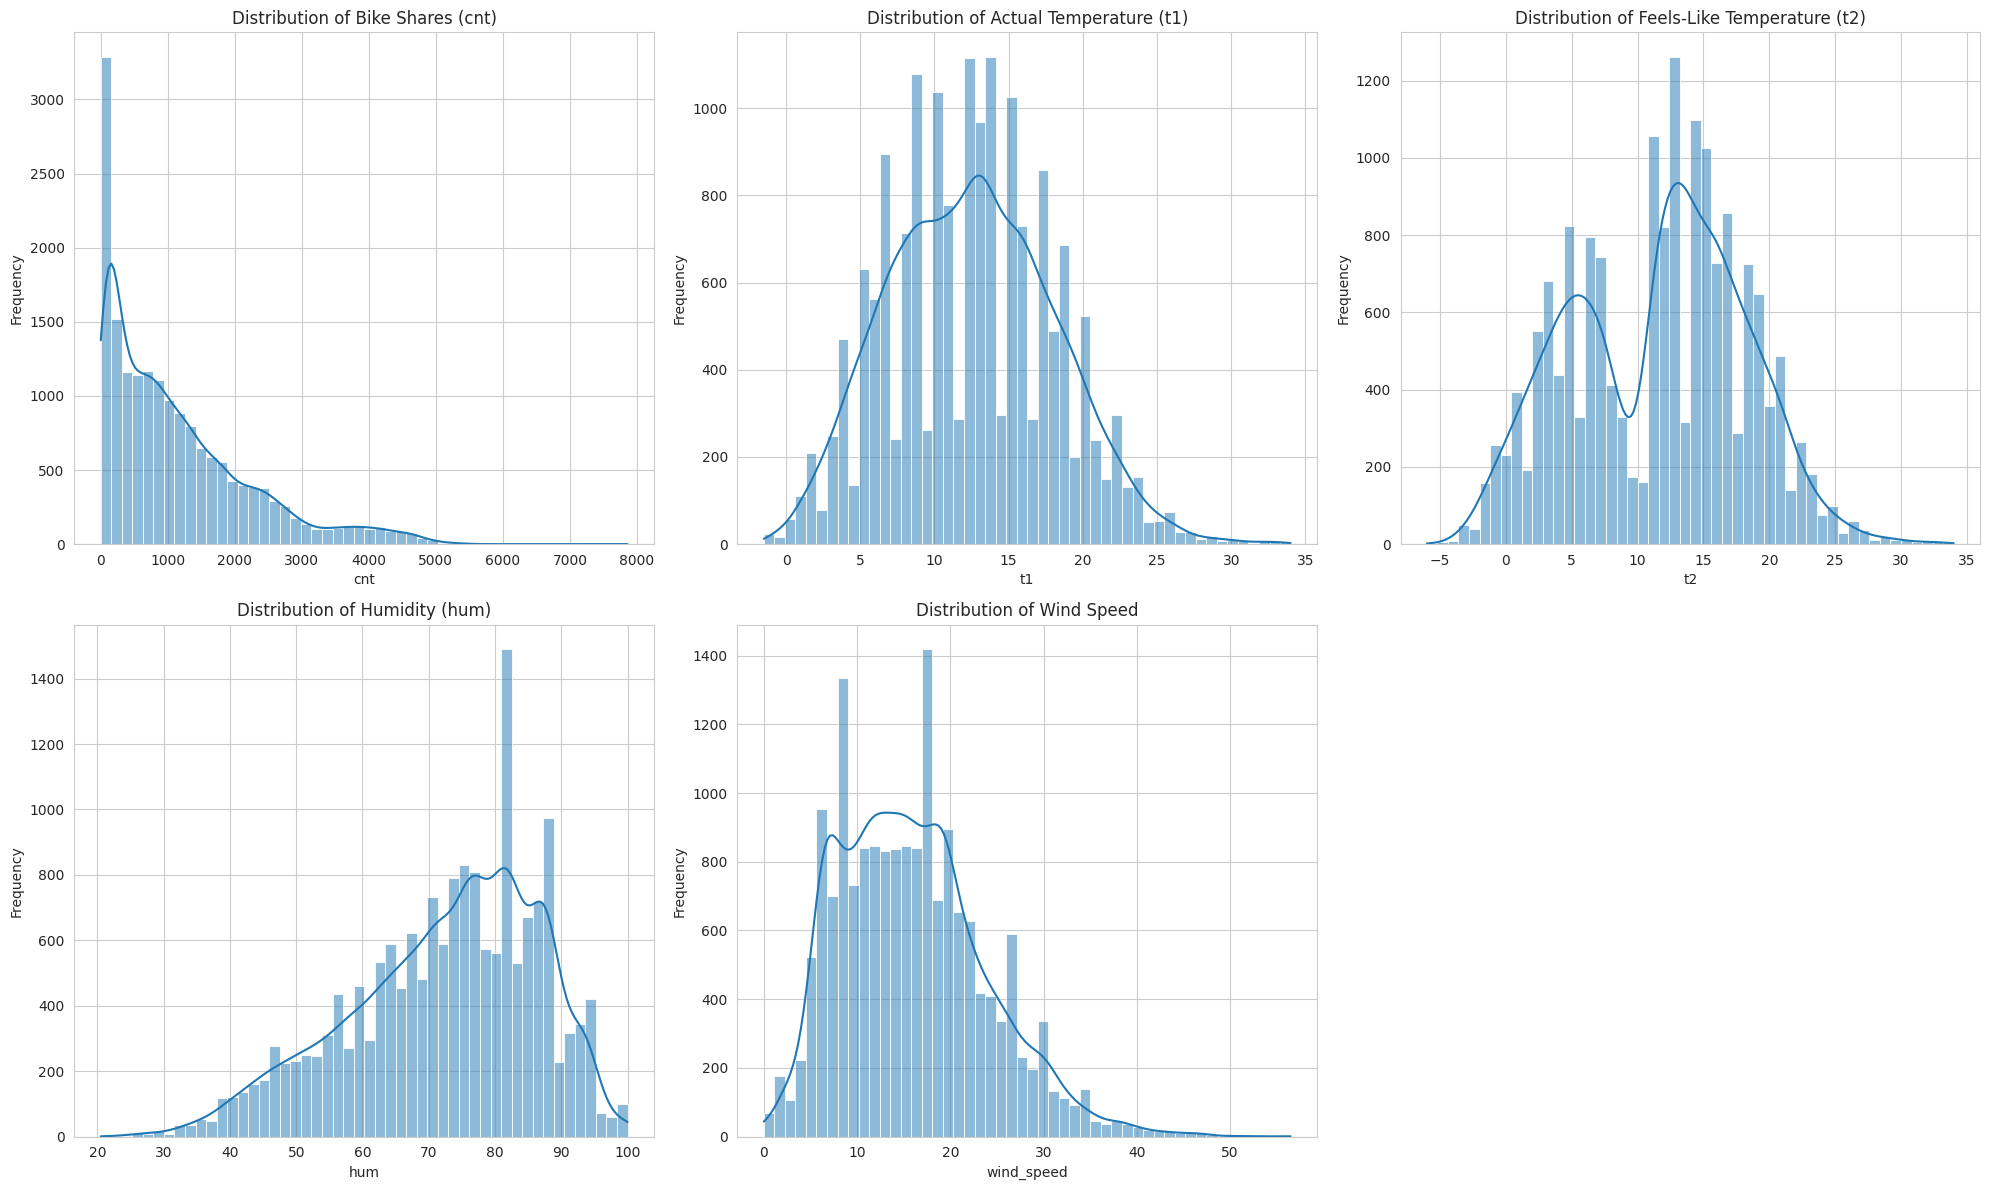

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 12))

# Create subplots for each of the continuous features
features = ['cnt', 't1', 't2', 'hum', 'wind_speed']
titles = ['Distribution of Bike Shares (cnt)', 'Distribution of Actual Temperature (t1)', 'Distribution of Feels-Like Temperature (t2)', 'Distribution of Humidity (hum)', 'Distribution of Wind Speed']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(titles[i-1])
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Visualizations for the categorical features**

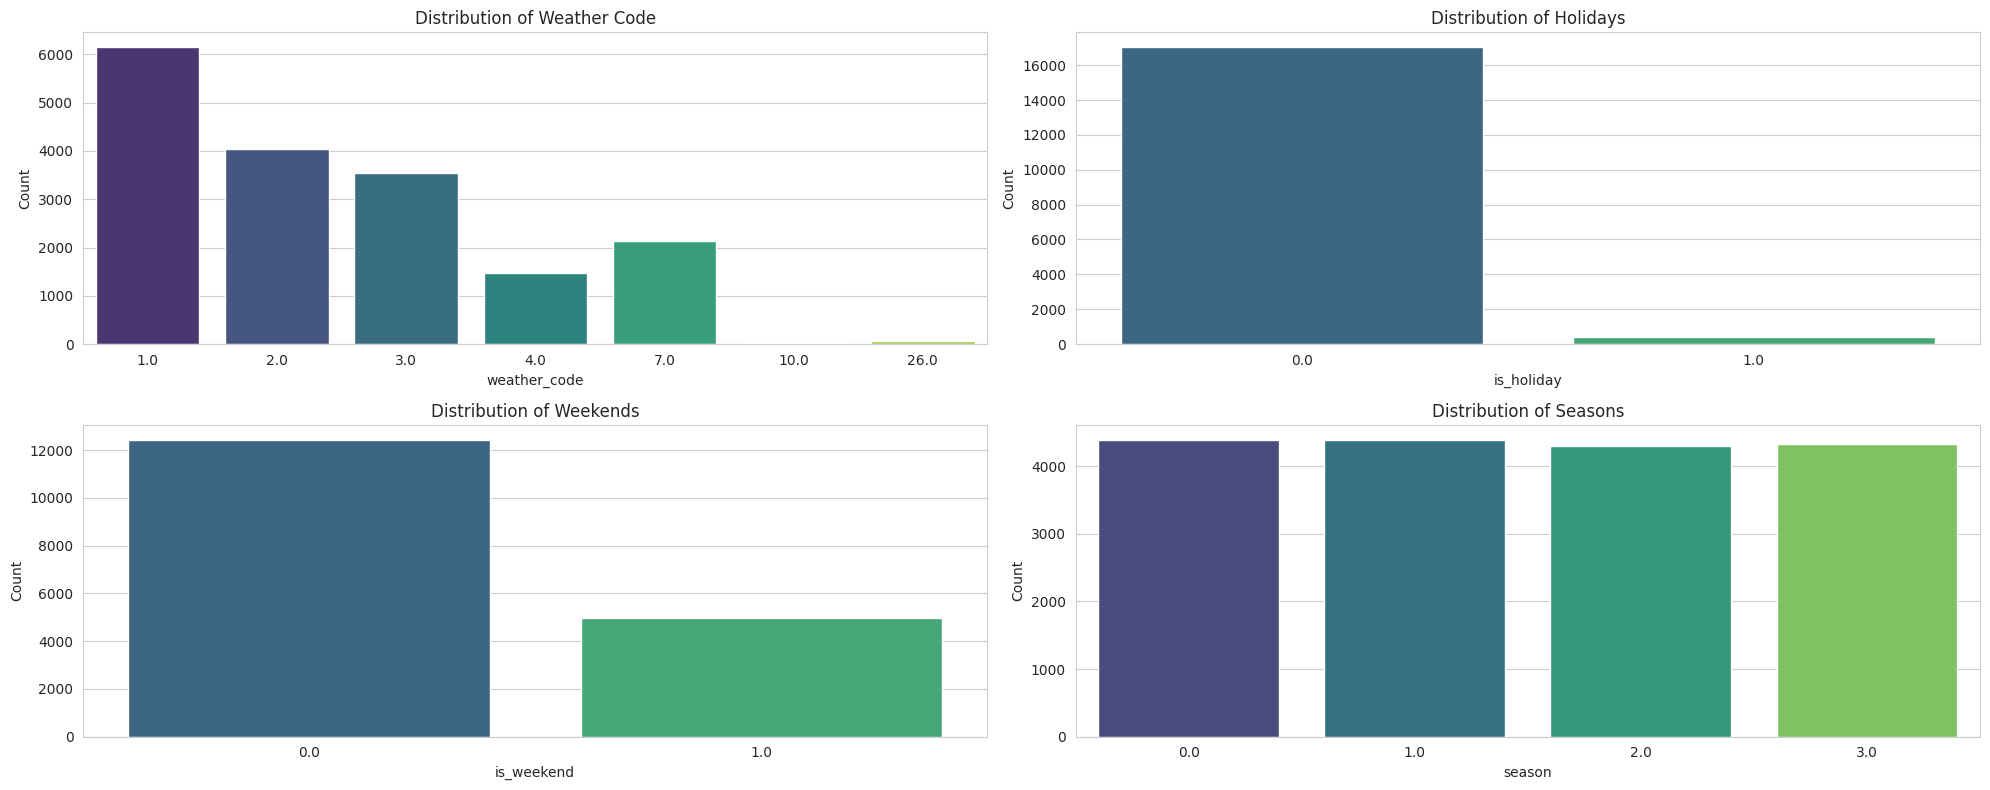

In [5]:
# Initialize the figure for categorical features
plt.figure(figsize=(20, 8))

# Create subplots for each of the categorical features
categorical_features = ['weather_code', 'is_holiday', 'is_weekend', 'season']
titles = ['Distribution of Weather Code', 'Distribution of Holidays', 'Distribution of Weekends', 'Distribution of Seasons']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(titles[i-1])
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Identifying potential outliers and analyzing relationships**

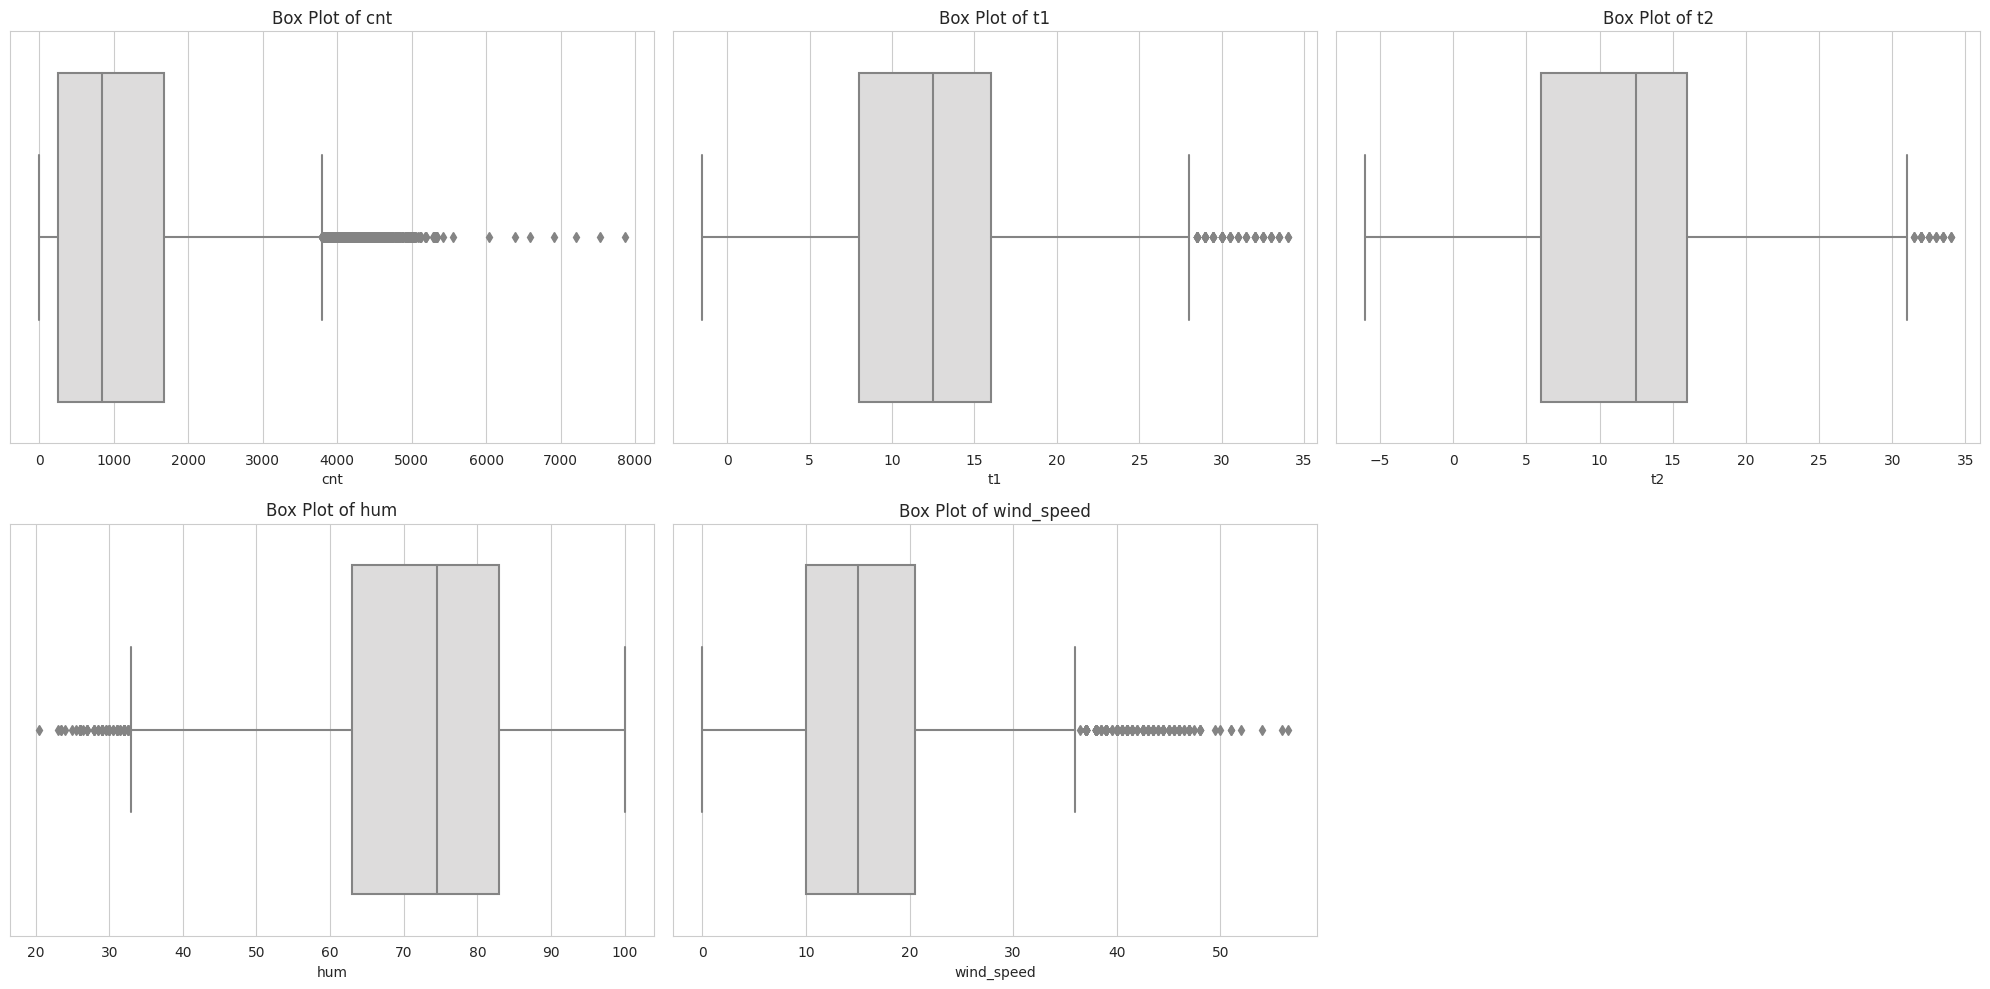

In [6]:
# Initialize the figure for box plots
plt.figure(figsize=(20, 10))

# Create subplots for each of the continuous features to identify outliers
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature], palette='coolwarm')
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()

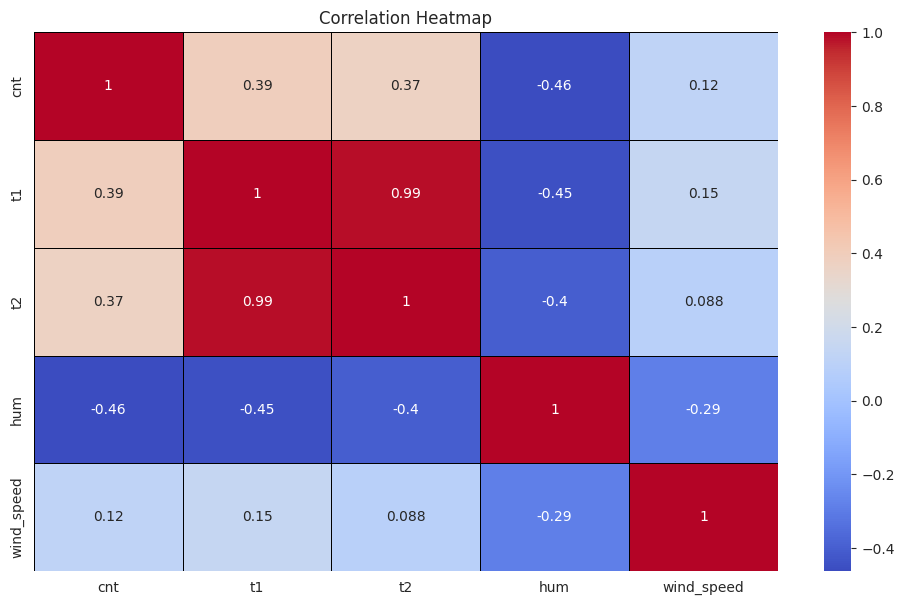

In [7]:
# Compute the correlation matrix
correlation_matrix = data[features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

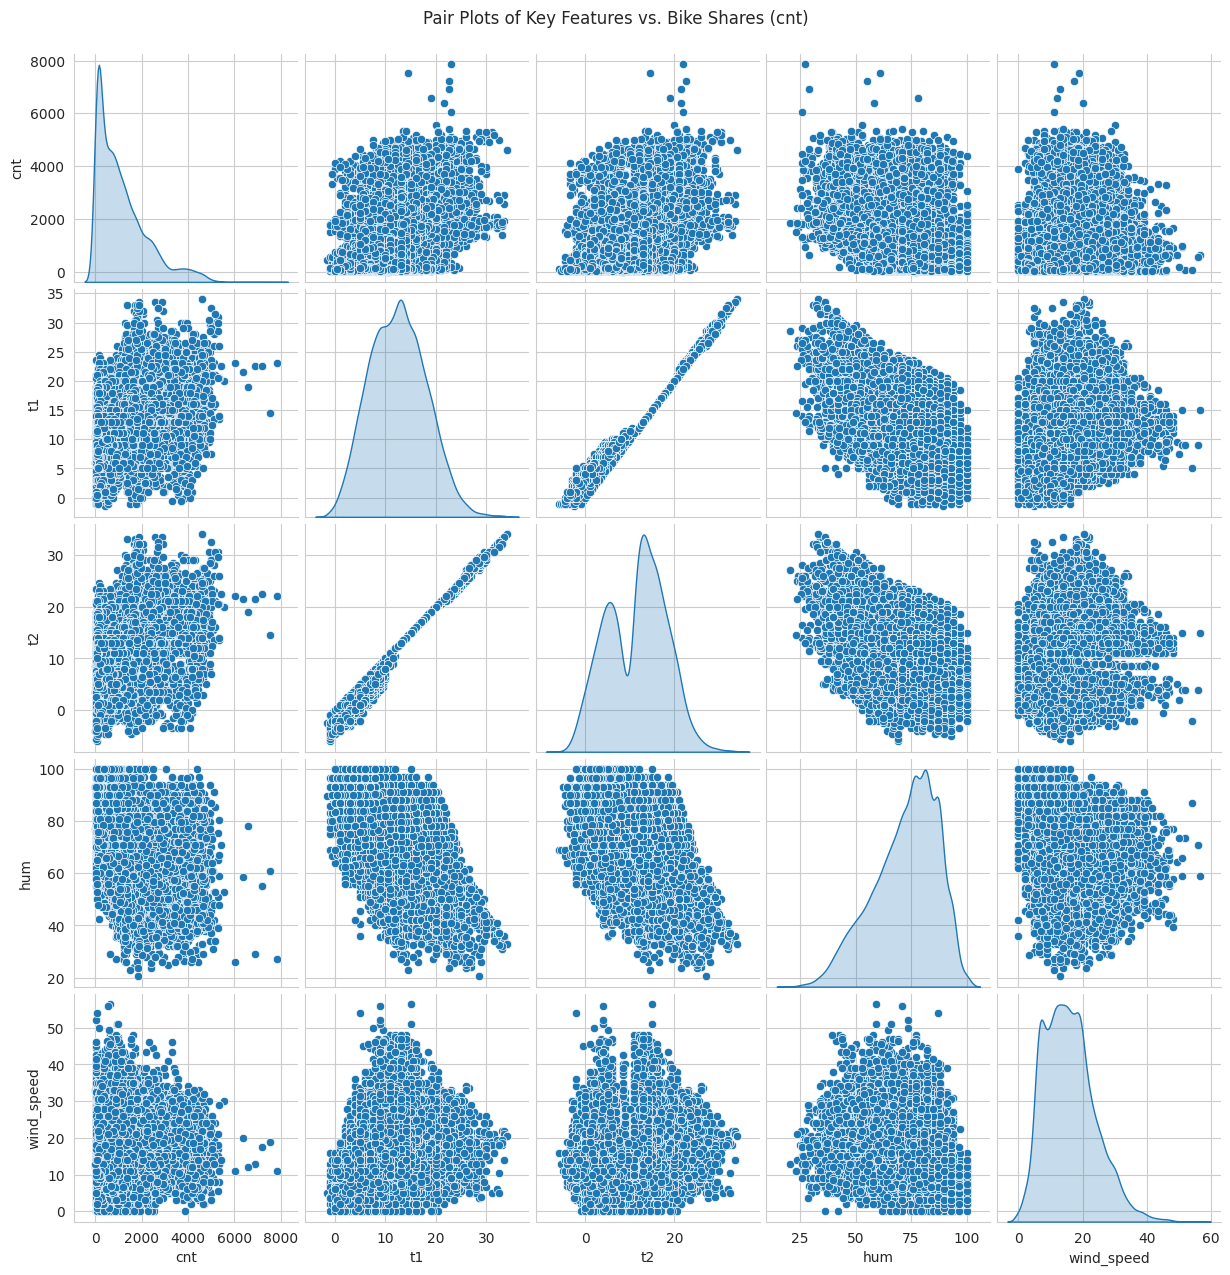

In [8]:
# Plotting pair plots for continuous features against the target variable 'cnt'
sns.pairplot(data=data, vars=['cnt', 't1', 't2', 'hum', 'wind_speed'], kind='scatter', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pair Plots of Key Features vs. Bike Shares (cnt)", y=1.02)
plt.show()

**Potential outliers and decide on handling strategies**

In [9]:
# Function to calculate IQR and identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identify outliers for 'cnt' feature
cnt_outliers, cnt_lower_bound, cnt_upper_bound = identify_outliers(data, 'cnt')
cnt_outliers_count = cnt_outliers.shape[0]

cnt_outliers_count, cnt_lower_bound, cnt_upper_bound

(675, -1865.125, 3793.875)

In [10]:
# Identify outliers for 'hum' feature
hum_outliers, hum_lower_bound, hum_upper_bound = identify_outliers(data, 'hum')
hum_outliers_count = hum_outliers.shape[0]

hum_outliers_count, hum_lower_bound, hum_upper_bound

(71, 33.0, 113.0)

In [11]:
# Identify outliers for 'wind_speed' feature
wind_speed_outliers, wind_speed_lower_bound, wind_speed_upper_bound = identify_outliers(data, 'wind_speed')
wind_speed_outliers_count = wind_speed_outliers.shape[0]

wind_speed_outliers_count, wind_speed_lower_bound, wind_speed_upper_bound

(236, -5.75, 36.25)

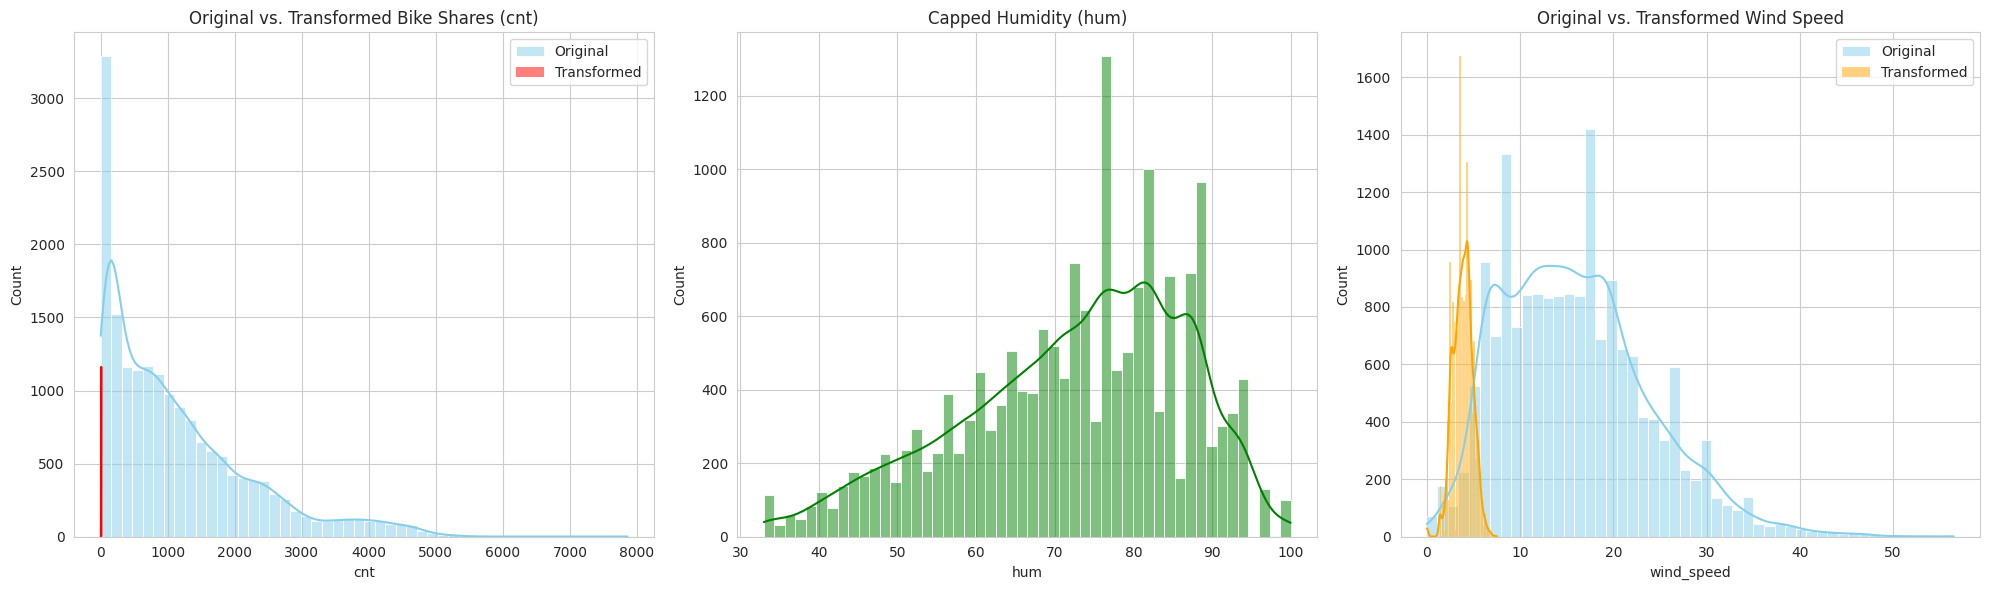

In [12]:
import numpy as np

# Applying transformations and capping

# Log transformation for 'cnt'
data['cnt_transformed'] = np.log1p(data['cnt'])

# Capping for 'hum'
data['hum'] = np.clip(data['hum'], 33.0, 100.0)

# Square root transformation for 'wind_speed'
data['wind_speed_transformed'] = np.sqrt(data['wind_speed'])

# Let's visualize the transformed features to see the effect
plt.figure(figsize=(20, 6))

# Original vs. Transformed 'cnt'
plt.subplot(1, 3, 1)
sns.histplot(data['cnt'], bins=50, kde=True, color='skyblue', label='Original')
sns.histplot(data['cnt_transformed'], bins=50, kde=True, color='red', label='Transformed')
plt.title('Original vs. Transformed Bike Shares (cnt)')
plt.legend()

# Capped 'hum'
plt.subplot(1, 3, 2)
sns.histplot(data['hum'], bins=50, kde=True, color='green')
plt.title('Capped Humidity (hum)')

# Transformed 'wind_speed'
plt.subplot(1, 3, 3)
sns.histplot(data['wind_speed'], bins=50, kde=True, color='skyblue', label='Original')
sns.histplot(data['wind_speed_transformed'], bins=50, kde=True, color='orange', label='Transformed')
plt.title('Original vs. Transformed Wind Speed')
plt.legend()

plt.tight_layout()
plt.show()

**Data preprocessing phase**

**Feature Engineering & Processing**

In [13]:
# Convert the 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract hour, day, month, and year from the 'timestamp' column
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# Drop the original 'timestamp' column
data = data.drop(columns=['timestamp'])

# Display the first few rows of the dataset after extracting features
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_transformed,wind_speed_transformed,hour,day,month,year
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,5.209486,2.449490,0,4,1,2015
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,4.934474,2.236068,1,4,1,2015
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,4.905275,0.000000,2,4,1,2015
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,4.290459,0.000000,3,4,1,2015
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,3.871201,2.549510,4,4,1,2015


In [14]:
# Drop the 't2' column to handle multicollinearity
data = data.drop(columns=['t2'])

# Display the first few rows of the dataset after dropping 't2'
data.head()

,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_transformed,wind_speed_transformed,hour,day,month,year
0,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,5.209486,2.449490,0,4,1,2015
1,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,4.934474,2.236068,1,4,1,2015
2,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,4.905275,0.000000,2,4,1,2015
3,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,4.290459,0.000000,3,4,1,2015
4,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,3.871201,2.549510,4,4,1,2015


**Scale the features to prepare them for machine learning algorithms**

In [15]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['t1', 'hum', 'wind_speed', 'weather_code', 'cnt_transformed', 'wind_speed_transformed', 'hour', 'day', 'month', 'year']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Display the first few rows of the scaled dataset
data.head()

,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_transformed,wind_speed_transformed,hour,day,month,year
0,182,-1.699331,1.448190,-1.255717,0.118427,0.0,1.0,3.0,-0.958481,-1.377380,-1.664802,-1.336447,-1.597332,-0.999346
1,138,-1.699331,1.448190,-1.382390,-0.735874,0.0,1.0,3.0,-1.172872,-1.586356,-1.520204,-1.336447,-1.597332,-0.999346
2,134,-1.789071,1.693538,-2.015755,-0.735874,0.0,1.0,3.0,-1.195634,-3.775846,-1.375605,-1.336447,-1.597332,-0.999346
3,72,-1.878811,1.938886,-2.015755,-0.735874,0.0,1.0,3.0,-1.674924,-3.775846,-1.231007,-1.336447,-1.597332,-0.999346
4,47,-1.878811,1.448190,-1.192381,-0.735874,0.0,1.0,3.0,-2.001764,-1.279444,-1.086408,-1.336447,-1.597332,-0.999346


**Feature Selection**

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Define the features and target variable
X = data.drop(columns=['cnt', 'cnt_transformed'])
y = data['cnt_transformed']

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
8,hour,0.820453
5,is_weekend,0.057867
0,t1,0.045374
1,hum,0.014737
3,weather_code,0.014192
4,is_holiday,0.012820
9,day,0.009601
10,month,0.009310
7,wind_speed_transformed,0.004988
2,wind_speed,0.004755


**Data Splitting**

In [18]:
from sklearn.model_selection import train_test_split

# Drop the timestamp column as it's not needed for model training
data = pd.read_csv("london_merged.csv")
data = data.drop(columns=['timestamp'])

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['cnt'])
y = data['cnt']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((13931, 8), (3483, 8))

**Model Building**

**Linear Regression model**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Calculate the mean squared error for the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mse

898006.9695697722

**Decision Tree Regressor**

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Calculate the mean squared error for the Decision Tree Regressor
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mse

1579565.197796041

**Random Forest Regressor**

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate the mean squared error for the Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mse

907785.3352378007

**Gradient Boosting Regressor**

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Calculate the mean squared error for the Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mse

815824.9669002974

**Feature importance plot for the Gradient Boosting Regressor**

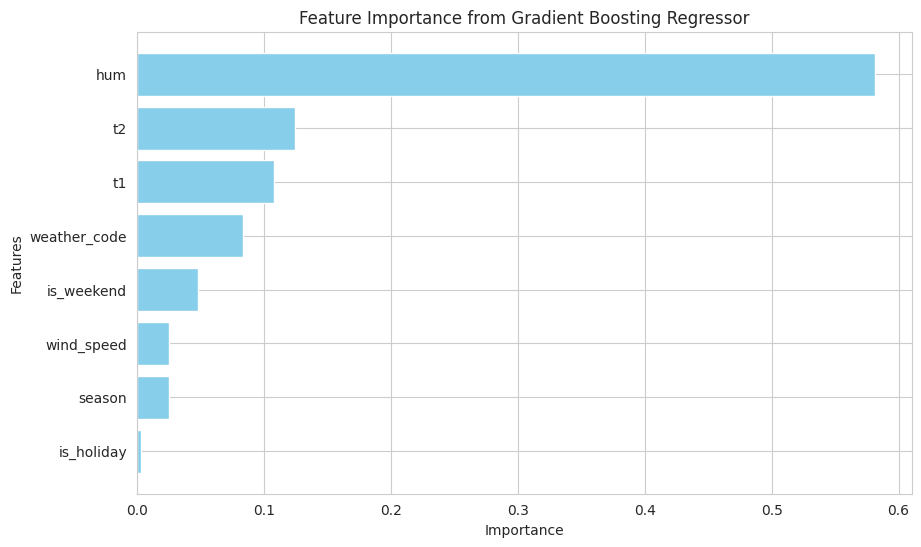

In [23]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(features_df['Features'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()